CS249 -- Spring 2016 -- D.S. Parker &copy; 2016

# HW0:  Fitting Distributions with Maximum Likelihood

The basic problem here is to determine, when given an input sequence of real values,
which distribution it follows.
More specifically, for this assignment you are to develop a notebook that
reads in a numeric table, and -- for each dataset
(i.e., each column in the table) -- determines the
distribution and parameters that gives the closest match to it.

For example, your notebook could read an input table like this:
<table>
<thead>
<tr><td> D1 </td><td> D2 </td><td> D3 </td><td> D4 </td><td> D5 </td><td> D6 </td></tr>
</thead>
    <tbody>
<!-- <tr><td> %       4.53256780 </td><td> 4.12387032 </td><td> 1.46654007 </td><td> 0.07384185 </td><td> 4.14580352 </td><td> 6.21513567 </td></tr> -->
 <tr><td> 7.1378018 </td><td> 6.8581740 </td><td> 0.2379494 </td><td> 0.1476523 </td><td> 5.3174948 </td><td> 3.1291521 </td></tr>
 <tr><td> 3.3713903 </td><td> 6.2437282 </td><td> 0.2138276 </td><td> 0.1699299 </td><td> 1.5583491 </td><td> 0.6543210 </td></tr>
<!-- <tr><td> %       2.7725880 </td><td> 5.5875745 </td><td> 0.4583172 </td><td> 0.3767378 </td><td> 2.8429449 </td><td> 1.9559299 </td></tr> -->
<tr><td> : </td><td> : </td><td> : </td><td> : </td><td> : </td><td> :  </td></tr>
<!-- <tr><td> %       7.2775941 </td><td> 5.2902876 </td><td> 0.9740191 </td><td> 2.6121070 </td><td> 5.9899608 </td><td> 6.7003783 </td></tr> -->
 <tr><td> 8.7408465 </td><td> 2.7770890 </td><td> 2.7271062 </td><td> 0.5956197 </td><td> 2.3983975 </td><td> 8.8628316 </td></tr>
</tbody>
</table>

The columns of this table define six datasets.
Your notebook should produce a CSV file <tt>HW0_output.csv</tt>
giving distributions that (it thinks) best fit the data.
A correct output file could then look like this:
<pre>
        gamma,9,2,
        normal,4,2,
        lognormal,0,1
        exponential,1,,
        chi-squared,5,,
        logistic,3,2,
</pre>
For simplicity, the parameters used in this assignment will always be
integers, so the printed output should always have integer parameter values.

Your notebook can determine the distribution that fits best in any way you like.
However, the <tt>fitdistr()</tt> function in the <tt>MASS</tt>
library gives a simple way to do this.
The notebook describes the assignment in much more detail,
and gives orientation about how to do things in R.

In other words: yes, this is a simple assignment.  It is intended as a warmup.

After running your notebook on the test input file <tt>HW0_test.csv</tt>,
to complete this assignment please upload two files to CCLE:
<ul><li>
your output CSV file <tt>HW0_output.csv</tt>
</li><li>
your notebook file <tt>HW0_Fitting_Distributions.ipynb</tt>
</li></ul>

We will not execute your uploaded notebook.
It should have the commands you used to produce the output file ---
in order to show your work.
As announced, all assignment grading in this course will be automated,
and the notebook is needed in order to check results of the grading program.



<p style="color:blue;">
<b>Summary:</b> the basic problem is to determine,
given a dataset of random real values, which distribution it follows.
Your notebook should read in a numeric table, and --
where each column in the table is a "dataset"
-- identify the distribution and parameters that gives the closest match to it.
<br/><br/>
<b>Important Notes</b>:
</p>
<ul><li>
<p style="color:blue;">
For simplicity, the <b>parameters in this assignment will always be integers</b>.
Your printed output should always have integer parameter values.
</p>
<br/>
</li><li>
<p style="color:blue;">
<b>Some distribution descriptions are equivalent</b>.
For example,
</p>
<pre>
 exponential,1,
 gamma,1,1
 weibull,1,1
</pre>
<p style="color:blue;">
<b>are equivalent.  These pdfs all are equal to $e^{-x}$.</b>
<br/>
<b>Your output file can use ANY equivalent form</b>.
The grading program will treat equivalent forms for distributions as correct.
</p>
</li><li>
<p style="color:blue;">
<b>We will use Paul Eggert's Late Policy</b>: The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor H/24\rfloor}$ points are
deducted.
</p>
</li></ul>


## fitdistr

You can use the "fitdistr" function in the MASS library
to fit distributions to data.


In [3]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("MASS"))  install.packages("MASS")  # we need the MASS package
#if (not.installed("lmom"))  install.packages("lmom")  # we need the MASS package
library(MASS)  #  load the MASS package
#library(lmom)
#  ?fitdistr      #  look at the help for the fitdistr function

##  Generate a sample table with 6 columns (datasets)

The table is of size (N x 6), where N=10000.
Each column in this dataset is a random sample from a different distribution.

In [4]:
# We generate a table whose _columns_ are random samples from different distributions.

# Each sample is of size N:

N = 10000

D1 = rgamma( N, 9, 2 )
D2 = rnorm( N, 4, 2 )
D3 = rlnorm( N, 0, 1 )
D4 = rexp( N, 1 )
D5 = rchisq( N, 5 )
D6 = rlogis( N, 3, 2 )

# All parameter values in this assignment will be integers !

Table = round(cbind( D1,D2,D3,D4,D5,D6 ),8)

colnames(Table) = c("D1","D2","D3","D4","D5","D6")

# print the first few lines of the (N x 6) table:

head(Table)


D1,D2,D3,D4,D5,D6
2.9839142,6.5561206,0.1396751,1.4622325,1.1223455,5.3487303
5.6780298,5.5822256,1.5521992,0.4084584,2.3495374,4.0460859
3.9676910,2.2546372,0.4036911,0.3634833,4.9249680,0.8615353
4.6422387,4.3452554,1.1296542,0.0438708,1.6287170,3.1385431
4.57346987,3.84533661,2.26443182,0.00230341,1.13074836,4.45117487
4.0101049,0.3615259,1.0409346,0.1223446,4.2328442,12.5978013


## Histograms permit visualization of each column/sample in the Table

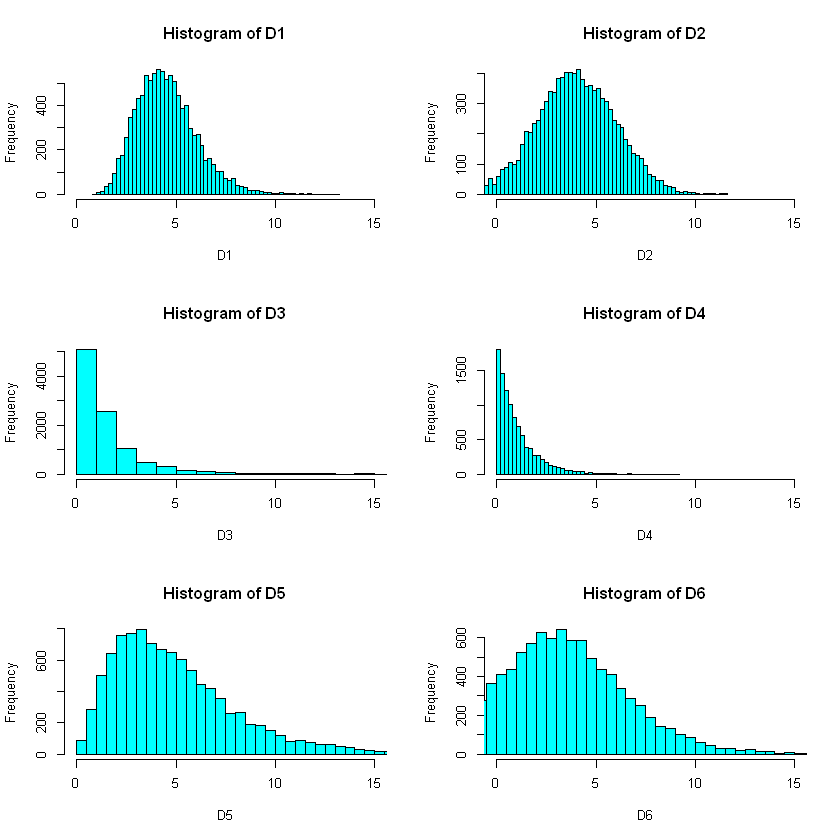

In [5]:
opar = par(mfrow = c(3,2))  # make a 3x2 grid of plots

# make 3 rows of plots, with 2 plots per row

B=60
hist( D1, col="cyan", xlim=c(0,15), breaks=B )
hist( D2, col="cyan", xlim=c(0,15), breaks=B )
hist( D3, col="cyan", xlim=c(0,15), breaks=B )
hist( D4, col="cyan", xlim=c(0,15), breaks=B )
hist( D5, col="cyan", xlim=c(0,15), breaks=B )
hist( D6, col="cyan", xlim=c(0,15), breaks=B )

par(opar)  # restore previous values of plotting parameters

## You should handle these kinds of distributions:

In [6]:
Distribution_name = c(
    "normal",
    "t",
    "chi-squared",
    "lognormal",
    "exponential",
    "gamma",
    "logistic"
)

Distribution_can_have_negative_values = c(
    TRUE,
    TRUE,
    FALSE,
    FALSE,
    FALSE,
    FALSE,
    TRUE
)

Distribution_function = c(
    dnorm,
    dt,
    dchisq,
    dlnorm,
    dexp,
    dgamma,
    dlogis
)

Distribution_color = c(
    "blue",
    "cyan",
    "green",
    "gold",
    "magenta",
    "red",
    "purple"
)

add_curve = function( dist_name, p ) {
    if (dist_name == "normal")      curve( dnorm(x, p[1], p[2] ),    col="blue",   lwd=2, add=TRUE )
    if (dist_name == "t")           curve( dt(x, p[1], p[2], p[3] ), col="cyan",   lwd=2, add=TRUE )
    if (dist_name == "chi-squared") curve( dnorm(x, p[1] ),          col="green",  lwd=2, add=TRUE )
    if (dist_name == "lognormal")   curve( dlnorm(x, p[1], p[2] ),   col="gold",   lwd=2, add=TRUE )
    if (dist_name == "exponential") curve( dexp(x, p[1] ),           col="magenta",lwd=2, add=TRUE )
    if (dist_name == "gamma")       curve( dgamma(x, p[1], p[2] ),   col="red",    lwd=2, add=TRUE )
    if (dist_name == "logistic" )   curve( dlogis(x, p[1], p[2] ),   col="purple", lwd=2, add=TRUE )
}

## Sample analysis of the data in R, with fitdistr:


trying Dataset 1:
Dataset is nonnegative
normal 5 2
               log-likelihood = -18271.395234
t 4 1 12
               log-likelihood = -18198.156073
chi-squared 5
               log-likelihood = -20954.989949
lognormal 1 0
               log-likelihood = -17961.695596
exponential 0
               log-likelihood = -25079.783980
gamma 9 2
               log-likelihood = -17872.339934
logistic 4 1
               log-likelihood = -18222.305605

trying Dataset 2:
Dataset has some negative values, so it cannot follow nonnegative distributions


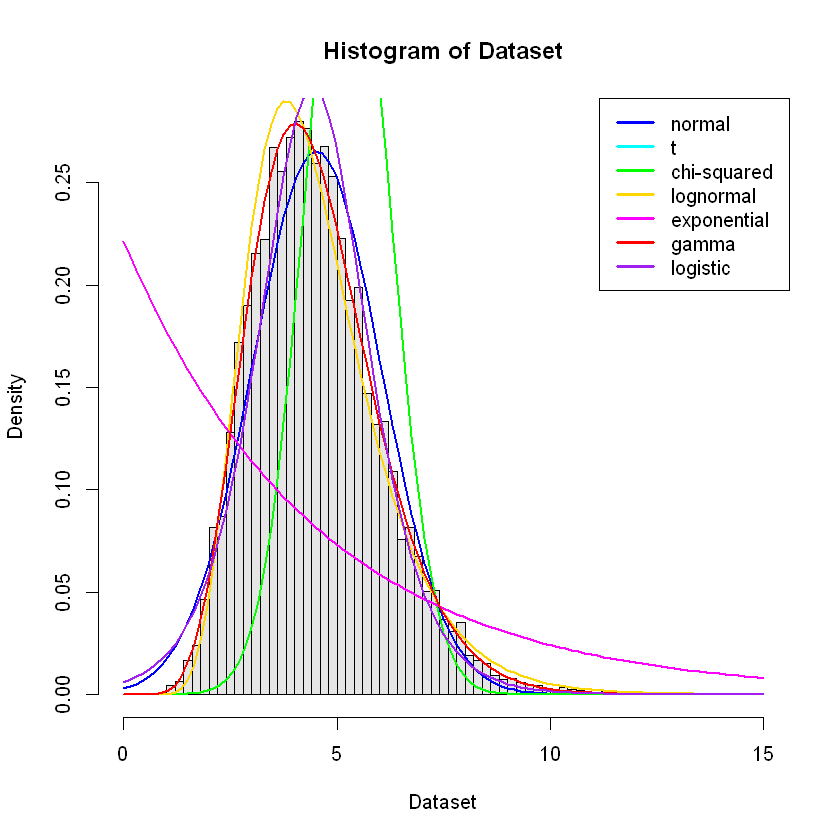

normal 4 2
               log-likelihood = -20998.124877
t 4 2 74
               log-likelihood = -21002.085787
logistic 4 1
               log-likelihood = -21113.422959

trying Dataset 3:
Dataset is nonnegative


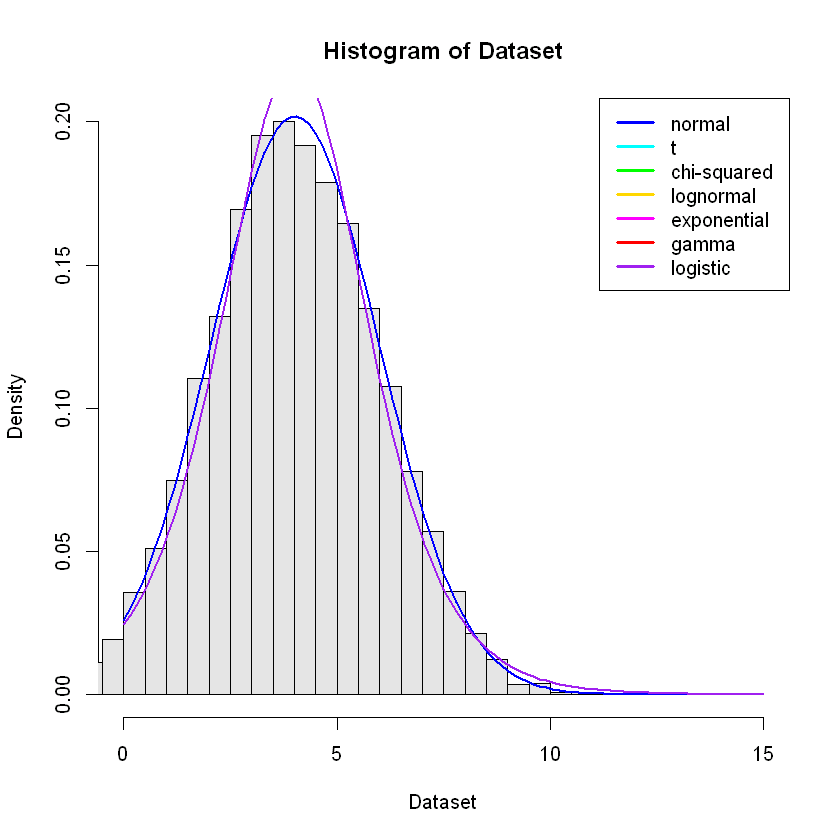

normal 2 2
               log-likelihood = -21555.706100
t 1 1 1
               log-likelihood = -16725.794148
chi-squared 2
               log-likelihood = -15004.074770
lognormal 0 1
               log-likelihood = -13999.405541
exponential 1
               log-likelihood = -14851.146729
gamma 1 1
               log-likelihood = -14798.852729
logistic 1 1
               log-likelihood = -18852.326179

trying Dataset 4:
Dataset is nonnegative


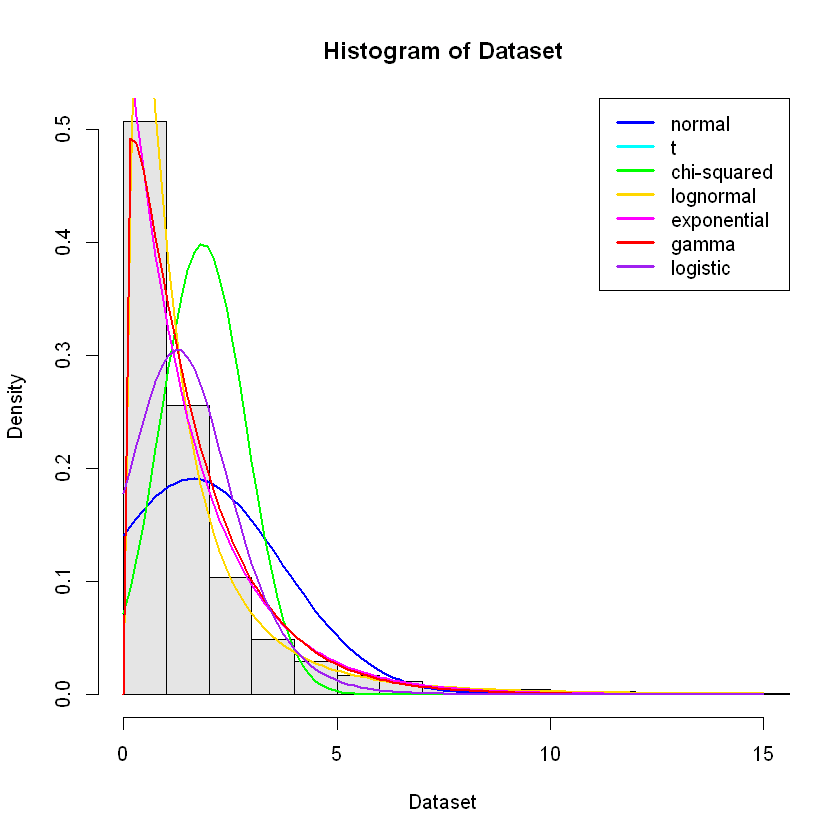

normal 1 1
               log-likelihood = -14205.756487
t 1 1 3
               log-likelihood = -13086.565820
chi-squared 1
               log-likelihood = -10760.431873
lognormal -1 1
               log-likelihood = -10987.421263
exponential 1
               log-likelihood = -10063.314937
gamma 1 1
               log-likelihood = -10063.117475
logistic 1 1
               log-likelihood = -13448.963310

trying Dataset 5:
Dataset is nonnegative


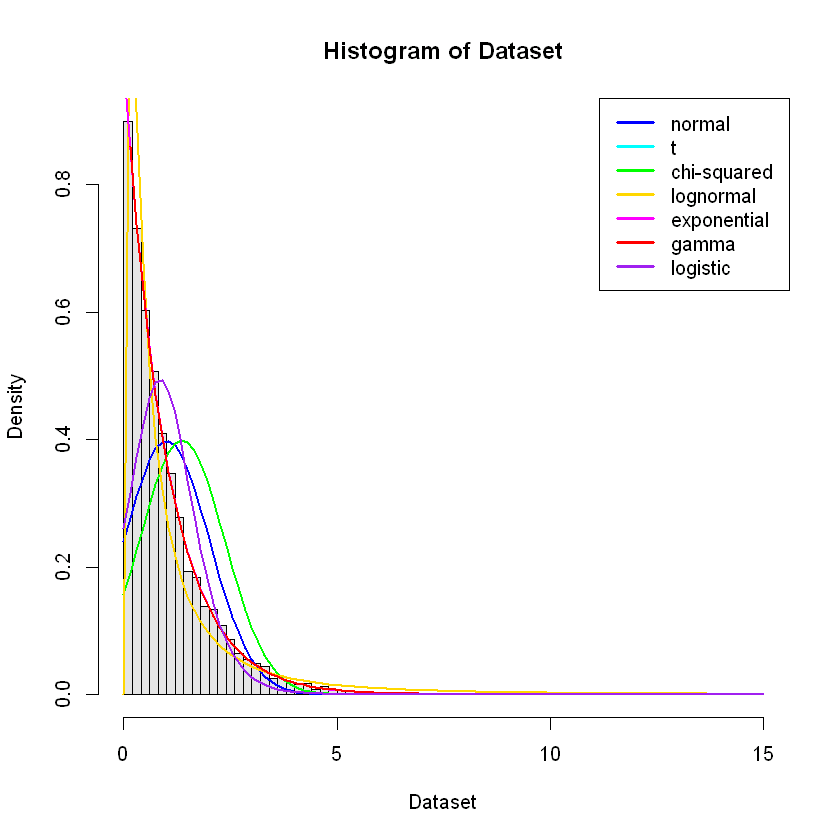

normal 5 3
               log-likelihood = -25647.399039
t 5 2 5
               log-likelihood = -25316.324110
chi-squared 5
               log-likelihood = -24163.229229
lognormal 1 1
               log-likelihood = -24514.683291
exponential 0
               log-likelihood = -26028.349879
gamma 3 1
               log-likelihood = -24163.112202
logistic 5 2
               log-likelihood = -25354.752079

trying Dataset 6:
Dataset has some negative values, so it cannot follow nonnegative distributions


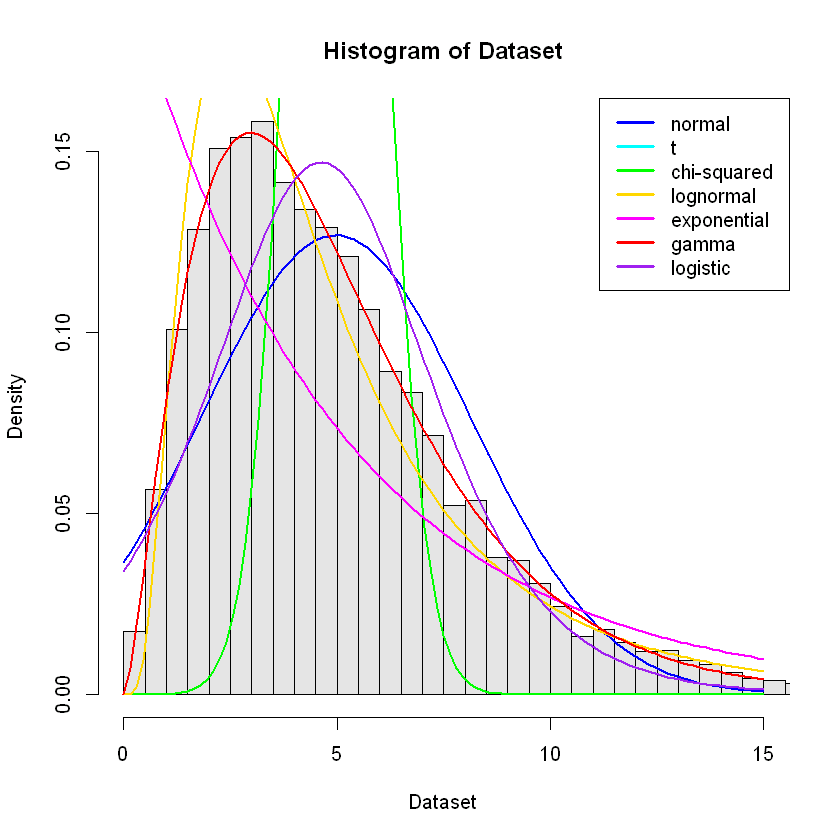

normal 3 4
               log-likelihood = -27020.911084
t 3 3 9
               log-likelihood = -26909.313496
logistic 3 2
               log-likelihood = -26908.343349


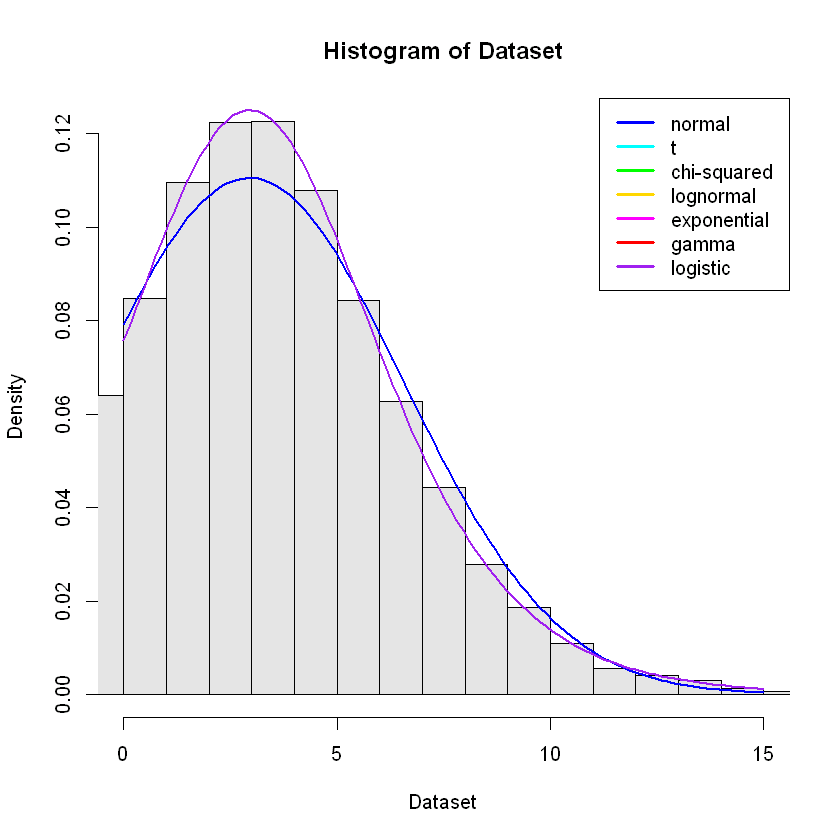

In [7]:
n = nrow(Table)
p = ncol(Table)

for (j in 1:p) {
    Dataset = Table[,j]   #  j-th dataset = j-th column of the data table
    cat(sprintf("\ntrying Dataset %d:\n", j))
    
    Dataset_is_nonnegative = !any( Dataset < 0 )
    if (Dataset_is_nonnegative) {
        cat("Dataset is nonnegative\n")
    } else {
        cat("Dataset has some negative values, so it cannot follow nonnegative distributions\n")
    }

    hist( Dataset, col="gray90", xlim=c(0,15), breaks=50, probability=TRUE )
    
    # display a histogram for each column Dataset
    
    legend( "topright", Distribution_name, col=Distribution_color, lwd=3 )

    for (i in 1:length(Distribution_name)) {
        dist_name = Distribution_name[i]
        if (Distribution_can_have_negative_values[i] || Dataset_is_nonnegative) {
            # don't fit a nonnegative distribution to data that is negative

            if (dist_name == "chi-squared") {  # fitdistr requires special handling of chi-squared
                fit = suppressWarnings( fitdistr( Dataset, dist_name,
                                                 list(df=round(mean(Dataset))), method="BFGS" ) )
            } else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
            }

            # "fit" is the object returned by fitdistr, describing the fit

            fitted_parameters = fit$estimate
            log_likelihood = fit$loglik

            parameter_value_string = paste(round(fitted_parameters), collapse=" ")
            # we round the parameter values so that they are integers.

            # This is what the output is supposed to look like:
            cat(sprintf("%s %s\n", dist_name, parameter_value_string))  

            # To show how good the fit is, we also print the log-likelihood here
            cat(sprintf("               log-likelihood = %f\n", log_likelihood))
            
            add_curve( dist_name, fitted_parameters )  # show the fit on the histogram

            # The optimal distribution is the one with maximum-likelihood
            #  (and:  maximum-likelihood == maximum-log-likelihood).
            # Your program needs to determine which distribution maximizes this.
        }
    }
}


# Problem:   Fit a distribution to each input dataset.

Specifically:

## Step 1.  Extend the program above to handle ANY input table ...... and also handle the Beta and Weibull distributions.

<p style="color:blue;">
These distributions are supported by fitdistr.
<br/><br/>
Note: values from the Beta distribution are always in the interval [0,1],
so any input data that goes outside this range cannot be from the Beta distribution.
<br/>
<b>Warning:</b> The <tt>optim</tt> optimizer in R
does not handle the <tt>dbeta</tt> function well.
Error messages like
<tt>initial value in 'vmmin' is not finite</tt>
are a result.
<br/>
Remember: any input data that goes outside the interval [0,1]
cannot be from the Beta distribution.
<br/><br/>
Your program does <i>not</i> have to handle
the F distribution, Negative Binomial distribution, Poisson distribution, etc.
</p>

### Your R program might be an extension of this outline:

<pre>
#  Read in a table (in csv format) from standard input:
Table = data.matrix(read.csv( file("stdin"), header=TRUE ))


Distribution = c( "normal", "t", "chi-squared", "lognormal", "exponential", "gamma", "logistic", .........................................)
  # include other distributions here

Distribution_can_have_negative_values = c( TRUE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE, .................................)

for (j in 1:ncol(Table)) {
    Dataset = Table[,j]        #  j-th dataset = the j-th column of the table
    Dataset_is_nonnegative = !any( Dataset < 0 )

    for (i in 1:length(Distribution)) {
        dist_name = Distribution[i]
        if (Distribution_can_have_negative_values[i] || Dataset_is_nonnegative) {
            # do not try to fit a nonnegative distribution to data that is negative

            if (dist_name == "chi-squared") {
                # fitdistr requires special handling of chi-squared
                fit = suppressWarnings( fitdistr( Dataset, dist_name,
                                  list(df=round(mean(Dataset))), method="BFGS" ) )
            } else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
            }

            fitted_parameters = fit$estimate
            log_likelihood = fit$loglik
            
            parameter_value_string = paste(round(fitted_parameters), collapse=" ")
            # print integer parameters
            cat(sprintf("%s %s\n", dist_name, parameter_value_string))

            # The optimal distribution is the one with maximum-likelihood
            #  (and:  maximum-likelihood == maximum-log-likelihood).
            # The optimal distribution needs to be tracked here .............
        }
    }
}
</pre>


## Step 2.  The output of your notebook should be a CSV file "HW0_output.csv" 

### Your output CSV file "HW0_output.csv" should look like this:
<p style="color:blue;">
If your program had been given the Table above as input,
it should print the following CSV file, a table with six rows, and FOUR columns:
</p>
<pre>
gamma,9,2,
normal,4,2,
lognormal,0,1,
exponential,1,,
chi-squared,5,,
logistic,3,2,
</pre>
<p style="color:blue;">
<i>There should be NO header line in this file.</i>
<br/><br/>
Each row has FOUR fields:  distribution name, and at most three parameter values.
(The $t$ distribution takes 3 parameter values, for example.)
<br/><br/>
If the input table has <i>p</i> columns (i.e., <i>p</i> random samples),
the output file should have <i>p</i> rows.
<br/><br/>
The parameters in this assignment will always be integers,
so the printed output should always have integer parameter values.
</p>

## Step 3. Run your notebook using the file "HW0_test.csv" as input.

## Step 4. Submit your output CSV file and revised notebook on CCLE.
<p style="color:blue;">
Upload your .ipynb and your .csv file for Assignment "HW0".  Both are required.
</p>

<p style="color:blue;">
We will use Paul Eggert's <b>Late Policy</b>: The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor H/24\rfloor}$ points are deducted.
</p>

In [98]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("MASS"))  install.packages("MASS")  # we need the MASS package
library(MASS)  #  load the MASS package
    
#  Read in a table (in csv format) from standard input:
Table = data.matrix(read.csv( file("HW0_test.csv"), header=TRUE ))


Distribution = c( "normal", "t", "chi-squared", "lognormal", "exponential", "gamma", "logistic", "beta", "weibull")
  # include other distributions here

Distribution_can_have_negative_values = c( TRUE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE, FALSE, FALSE)


    
for (j in 1:ncol(Table)) {
    Dataset = Table[,j]        #  j-th dataset = the j-th column of the table
    Dataset_is_nonnegative = !any( Dataset < 0 )
    minVal=min(Dataset)
    maxVal=max(Dataset)
    
    maxLogLikelihood = -Inf
    vecLine = c()

    for (i in 1:length(Distribution)) 
    {
        
        dist_name <- Distribution[i]
        if (dist_name=="beta" && (minVal < 0 || maxVal > 1)) next
        if (Distribution_can_have_negative_values[i] || Dataset_is_nonnegative) 
        {
            # do not try to fit a nonnegative distribution to data that is negative
            degreeOfFreedom = round(mean(Dataset))
            if (dist_name == "chi-squared") 
            {
                # fitdistr requires special handling of chi-squared
                if (degreeOfFreedom <= 0) degreeOfFreedom = 1
                fit = suppressWarnings( fitdistr( Dataset, dist_name, list(df=degreeOfFreedom), method="BFGS" ) )
            }
            else if (dist_name =="beta")
            {
                fit = suppressWarnings( fitdistr( Dataset, dist_name,start=list(shape1=0.5,shape2=0.5), method="BFGS" ) )
            }
            else
            {
                fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
            }

            fitted_parameters = fit$estimate
            log_likelihood = fit$loglik

            parameter_value_string = paste(round(fitted_parameters), collapse=" ")
            # print integer parameters
            #cat(sprintf("%s %s\n", dist_name, parameter_value_string))

            # The optimal distribution is the one with maximum-likelihood
            #  (and:  maximum-likelihood == maximum-log-likelihood).
            # The optimal distribution needs to be tracked here .............
                 #cat(sprintf("%s %f %f %f\n",dist_name,fitted_parameters[1],fitted_parameters[2], log_likelihood ))
                if (maxLogLikelihood < log_likelihood)
                {
                    maxDistName=dist_name
                    maxParameterString=parameter_value_string
                    maxFittedPara = fitted_parameters
                    maxLogLikelihood=log_likelihood

                }
        }
    }

       
        vecLine=c(NA,NA,NA,NA)
          vecLine[1]=maxDistName
            k=2
            for (p in 1:length(maxFittedPara))
            {
                vecLine[k]=round(maxFittedPara[p])
                k=k+1
            }  
            vecLine=t(vecLine)
            DF = data.frame(vecLine)
        write.table(DF, file = "HW0_output.csv", append = TRUE, quote = FALSE, sep = ",",
            eol = "\n", na = "", dec = ".", row.names = FALSE,
            col.names = FALSE, qmethod = c("escape", "double"),
            fileEncoding = "")
}

In [87]:
DF

,X1,X2,X3,X4
1,gamma,1,3,NA
